In [1]:
#  Patricia Hurlocker 
#  News media  (analysis of tweets for the organization)

In [2]:
# 1. Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#  Access Twitter API Keys vig config file
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

#consumer_key = "FZwZBQcQjG4p73LYx2wW7G4MM"
#consumer_secret = "BfwU6w65eqhriEENvTmcfJWlvsTSgYPBAr7JZtczcgYBOiRMaI"
#access_token = "1026353940604932096-X3VS3DREVJtVxhQG1PMlElH1Bwqgl5"
#access_token_secret = "J6Ozg1mTWmFi9MHB5hKVZzwt19Kp9tlZXbksVFTSJGodh"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# 2. Set the target news organizations, create lists, create a loop to run API requests

target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append news tweets results to 'results_list'
    results_list.append(sent)
 

In [4]:
# 3.  Define variables for x and y values for scatter plot 
#BBCNews
y_bbc = results_list[0]["Compound"]
x_bbc = results_list[0]["Number"]

#CBS
y_cbs = results_list[1]["Compound"]
x_cbs = results_list[1]["Number"]

#CNN
y_cnn = results_list[2]["Compound"]
x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = results_list[3]["Compound"]
x_fox = results_list[3]["Number"]

#nytimes
y_nyt = results_list[4]["Compound"]
x_nyt = results_list[4]["Number"]

In [5]:
# 4.  Initialize the datafram and set the index for the news organizations
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
@BBC,"[0.0, -0.2263, 0.0, 0.0, -0.4588, 0.0, 0.0, 0....","[1.0, 0.7, 1.0, 1.0, 0.864, 1.0, 1.0, 0.691, 0...","[0.0, 0.189, 0.0, 0.0, 0.136, 0.0, 0.0, 0.156,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153, 0...",100,[Dr Yasmin Khan tracks down passengers who tra...
@CBS,"[0.3182, 0.0, 0.4389, -0.3182, 0.4926, 0.8957,...","[0.874, 1.0, 0.874, 0.897, 0.856, 0.581, 1.0, ...","[0.0, 0.0, 0.0, 0.103, 0.0, 0.0, 0.0, 0.0, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.126, 0.0, 0.126, 0.0, 0.144, 0.419, 0.0, 0....",100,[How much does it cost to bury the truth? \n\n...
@CNN,"[0.0, 0.0, -0.5267, 0.2732, 0.0, -0.4019, 0.47...","[1.0, 1.0, 0.747, 0.896, 1.0, 0.847, 0.744, 1....","[0.0, 0.0, 0.253, 0.0, 0.0, 0.153, 0.0, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.104, 0.0, 0.0, 0.256, 0.0, 0...",100,"[The polls just closed in Connecticut, where D..."
@FoxNews,"[0.5859, -0.6808, 0.0, -0.4767, 0.0, -0.2023, ...","[0.798, 0.682, 1.0, 0.838, 1.0, 0.833, 0.649, ...","[0.0, 0.318, 0.0, 0.162, 0.0, 0.167, 0.157, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.195, 0.0, 0...",100,[JUST IN: Sen. @BernieSanders projected to win...
@nytimes,"[0.5267, 0.1027, 0.5994, 0.0, -0.4767, 0.0, -0...","[0.645, 0.813, 0.83, 1.0, 0.819, 1.0, 0.819, 1...","[0.109, 0.085, 0.0, 0.0, 0.181, 0.0, 0.181, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.246, 0.102, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, ...",100,[Senator Bernie Sanders easily won Vermont’s D...


In [6]:
# 5.  Initialize save DataFrame to csv
news_df.to_csv("Sentiment_Data.csv")

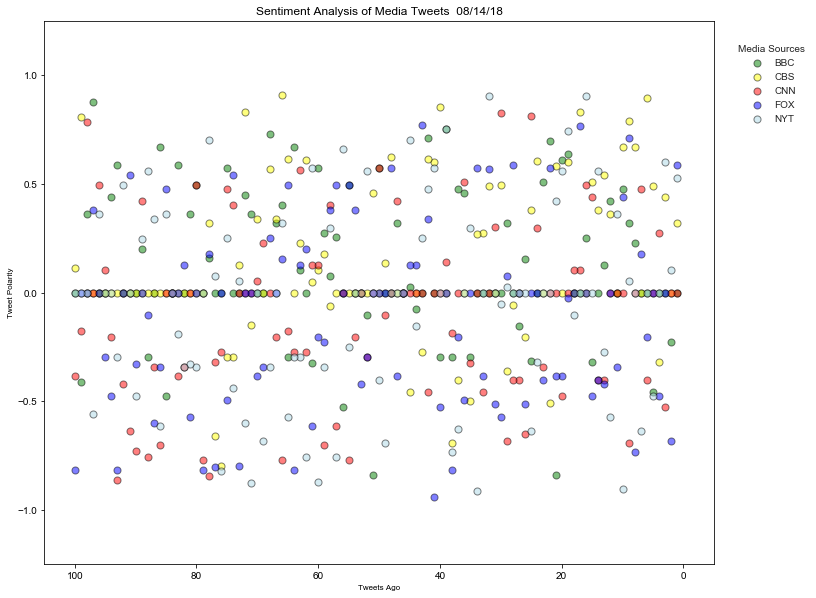

In [7]:
# 6.  Initialze the scatterplot 
import time
todaysdate = time.strftime("%m/%d/%y")

fix, ax  = plt.subplots(figsize =(12,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(105,-5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Tweets Ago", fontsize=8)
plt.ylabel("Tweet Polarity", fontsize=8)
plt.title("Sentiment Analysis of Media Tweets  " + todaysdate, fontsize=12)

plt.scatter(x_bbc, y_bbc, marker="o", s=50, facecolors="green", edgecolors="black", alpha=0.5, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", s=50, facecolors="yellow", edgecolors="black", alpha=0.5, label="CBS")
plt.scatter(x_cnn, y_cnn, marker="o", s=50, facecolors="red", edgecolors="black", alpha=0.5, label="CNN")
plt.scatter(x_fox, y_fox, marker="o", s=50, facecolors="blue", edgecolors="black", alpha=0.5, label="FOX")
plt.scatter(x_nyt, y_nyt, marker="o", s=50, facecolors="lightblue", edgecolors="black", alpha=0.5, label="NYT")
plt.legend(title="Media Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('news_scatterplot.png')

plt.show()

In [8]:
# 6.  Calculate the compound averages for tweet polarity

y_bbc = np.mean(results_list[0]["Compound"])
#x_bbc = results_list[0]["Text"]

#CBS
y_cbs = np.mean(results_list[1]["Compound"])
#x_cbs = results_list[1]["Number"]

#CNN
y_cnn = np.mean(results_list[2]["Compound"])
#x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = np.mean(results_list[3]["Compound"])
#x_fox = results_list[3]["Number"]

#nytimes
y_nyt = np.mean(results_list[4]["Compound"])
#x_nyt = results_list[4]["Number"]

y_cities = [y_bbc, y_cbs, y_cnn, y_fox, y_nyt]
colors = ["lightblue","green","red","blue","yellow"]
media_names = ["BBC", "CBS", "CNN", "FOX", "NYT"]

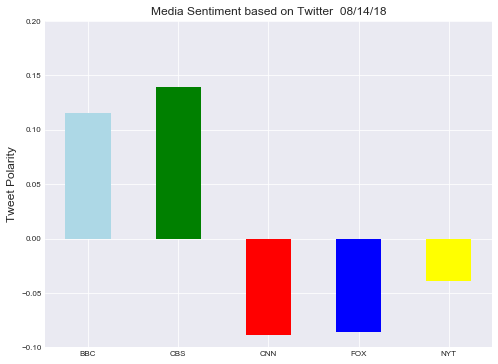

In [9]:
# 6.  Create the plot 
import time
todaysdate = time.strftime("%m/%d/%y")

fig, ax  = plt.subplots(figsize =(8,6))

sns.set_style("dark")
ax.grid(False)

plt.ylim(-.1,.2)
#plt.xlim(105,-5)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.ylabel("Tweet Polarity", fontsize=12)
plt.title("Media Sentiment based on Twitter  " +  todaysdate, fontsize=12)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=.5)

# Setting the grid
plt.grid(True)

plt.savefig('News_Media_Sentiment_barchart.png')

plt.show()

